### The data

The dataset was sourced from Bureau of Transportation Statistics website [2]. The information includes arrival and departure times and flight details for every commercial flight operating within the United States, from October 1995 to 2022. We limited our analysis to the last 5 years due to the large quantity of the dataset i.e. Jan 2018 – June 2022, with the total size of the csv files adding up to 3.46G. The dataset was delivered in the form of 54 zipped csv files organized by month and year. It took about 1 hour and 45 minutes to download the zipped files individually for each month, as there is no date range selector facility on the website. The files were unzipped and placed in Google drive, for easier access. I used Python to extract and merging the files in Jupyterlab. After merging the csv files, the resulting dataset contained about 28 million records, and takes up to 12.4G+ memory in Python. Every year, approximately 7 million flights are recorded from 23 carriers and 325 departure airports. The dataset also came with carrier names csv file, which we joined to the main dataset, using the carrier code. Every flight that occurred during that time period is represented by a row in the dataset, and each column has detailed information on every flight, including the airline, flight date, departure delay, and arrival delay, etc. More details about each variable can be seen in the data dictionary further down [3]. The time it took to load the dataset into Python on a machine with 16GB of RAM was 5 seconds. It took another 90 seconds to concatenate the data. The concatenating process was done in steps, by using a for loop, rather than merging all files at once, which would have obliterated the memory. 


In [ ]:
del df

In [59]:
# Import libraries
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import seaborn as sns 
from tabulate import tabulate

%matplotlib inline

In [51]:
#formatting required
pd.options.display.float_format = '{0:.2f}'.format

### Data Loading

In [52]:
pd.set_option("display.max.columns", None) #display all columns of the data

In [3]:
!pip install gdown
import gdown

In [ ]:
! gdown --id 1rdXBMKJfm_17Xq2L08omEWGqSrCfMJzA #upload first file from Google drive
df1 = pd.read_csv('merged_df1.csv') #read the first csv file

In [ ]:
! gdown --id 1oGs56pdUdLxdTcacjZ52sAmRulZoQEuV
df2 = pd.read_csv('merged_df2.csv')

In [ ]:
! gdown --id 1MdYsPz0l61RKsyPbxofg2gKGWT6GjZqs
df3 = pd.read_csv('merged_df3.csv')

In [ ]:
df = pd.concat([df1,df2,df3]) #concatenate
del (df1,df2,df3) #delete the individual files

In [24]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY
0,2018,1,22,1,UA,14771,SFO,10693,BNA,1110,1120.00,10.00,32.00,6.00,1731,1740.00,9.00,0.00,NaN,0.00,261.00,260.00,222.00,1.00,1969.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,22,1,UA,12892,LAX,14679,SAN,2245,2233.00,-12.00,20.00,3.00,2338,2323.00,-15.00,0.00,NaN,0.00,53.00,50.00,27.00,1.00,109.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,22,1,UA,11292,DEN,12266,IAH,1400,1357.00,-3.00,11.00,11.00,1721,1720.00,-1.00,0.00,NaN,0.00,141.00,143.00,121.00,1.00,862.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,22,1,UA,11618,EWR,14679,SAN,1621,1614.00,-7.00,26.00,2.00,1935,1902.00,-33.00,0.00,NaN,0.00,374.00,348.00,320.00,1.00,2425.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,22,1,UA,11298,DFW,11292,DEN,915,910.00,-5.00,18.00,7.00,1025,1015.00,-10.00,0.00,NaN,0.00,130.00,125.00,100.00,1.00,641.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop columns

In [64]:
df.drop(['FLIGHTS'], axis=1, inplace=True)

### Convert data types, to reduce dataset size

In [65]:
df['DEP_TIME'] = df['DEP_TIME'].astype('float32')
df['DEP_DELAY'] = df['DEP_DELAY'].astype('float32')
df['ARR_TIME'] = df['ARR_TIME'].astype('float32')
df['ARR_DELAY'] = df['ARR_DELAY'].astype('float32')
df['CANCELLED'] = df['CANCELLED'].astype('float16')
df['DIVERTED'] = df['DIVERTED'].astype('float16')
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].astype('float32')
df['DISTANCE'] = df['DISTANCE'].astype('float32')
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].astype('float32')
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].astype('float32')
df['NAS_DELAY'] = df['NAS_DELAY'].astype('float32')
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].astype('float32')
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].astype('float32')
df['DIV_REACHED_DEST'] = df['DIV_REACHED_DEST'].astype('float32')
df['DIV_ARR_DELAY'] = df['DIV_ARR_DELAY'].astype('float32')

In [66]:
#convert variable dtypes to save memory
df['YEAR'] = df['YEAR'].astype('int16')
df['MONTH'] = df['MONTH'].astype('int16')
df['DAY_OF_MONTH'] = df['DAY_OF_MONTH'].astype('int16')
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('int16')
df['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID'].astype('int16')
df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].astype('int16')
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype('int16')
#df['DELAY'] = df['DELAY'].astype('int16')

In [67]:
#create a new variable 'DELAY' which is 1 if delay time >= 15
df['DELAY'] = 0
df.loc[df['ARR_DELAY'] <= 0, 'DELAY'] = 1

In [68]:
df['DELAY'] = df['DELAY'].astype('int8')

### Data Exploration

In [69]:
len(df.index)

27992263

In [70]:
df.shape

(27992263, 33)

In [ ]:
#count duplicates
count_rows_dedup_data = len(df.drop_duplicates().index)

In [ ]:
count_rows_orig_data = len(df.index)
dup_records = count_rows_orig_data - count_rows_dedup_data
dup_records

In [71]:
df.drop_duplicates(inplace = True)

In [72]:
len(df.index)

27992249

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27992249 entries, 0 to 27992262
Data columns (total 33 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   YEAR                     int16  
 1   MONTH                    int16  
 2   DAY_OF_MONTH             int16  
 3   DAY_OF_WEEK              int16  
 4   OP_UNIQUE_CARRIER        object 
 5   ORIGIN_AIRPORT_ID        int16  
 6   ORIGIN                   object 
 7   DEST_AIRPORT_ID          int16  
 8   DEST                     object 
 9   CRS_DEP_TIME             int16  
 10  DEP_TIME                 float32
 11  DEP_DELAY                float32
 12  TAXI_OUT                 float64
 13  TAXI_IN                  float64
 14  CRS_ARR_TIME             int64  
 15  ARR_TIME                 float32
 16  ARR_DELAY                float32
 17  CANCELLED                float16
 18  CANCELLATION_CODE        object 
 19  DIVERTED                 float16
 20  CRS_ELAPSED_TIME         float32
 21  ACTUAL

### Summary Statistics

In [63]:
#df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) #don't use scientific notation
#summary_stats = df.describe(include='all').apply(lambda s: s.apply('{0:.5f}'.format))
summary_stats = df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
summary_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,27992263.00000,2019.75518,1.31509,2018.00000,2019.00000,2020.00000,2021.00000,2022.00000
MONTH,27992263.00000,6.30430,3.48790,1.00000,3.00000,6.00000,9.00000,12.00000
DAY_OF_MONTH,27992263.00000,15.74488,8.77568,1.00000,8.00000,16.00000,23.00000,31.00000
DAY_OF_WEEK,27992263.00000,3.96953,2.00179,1.00000,2.00000,4.00000,6.00000,7.00000
ORIGIN_AIRPORT_ID,27992263.00000,12674.76844,1526.77632,10135.00000,11292.00000,12889.00000,14057.00000,16869.00000
DEST_AIRPORT_ID,27992263.00000,12674.75249,1526.77835,10135.00000,11292.00000,12889.00000,14057.00000,16869.00000
DEP_TIME,27256641.00000,1292.15906,486.28772,1.00000,919.00000,1323.00000,1736.00000,2400.00000
DEP_DELAY,27255215.00000,9.91136,45.05570,-1280.00000,-6.00000,-3.00000,5.00000,3890.00000
ARR_TIME,27233120.00000,1381.04871,520.51453,1.00000,1055.00000,1505.00000,1911.00000,2400.00000
ARR_DELAY,27176410.00000,3.46041,46.73980,-1290.00000,-16.00000,-7.00000,6.00000,3864.00000


In [ ]:
#print rows where the specific varioble is less than 0
#df[df['ACTUAL_ELAPSED_TIME'] < 0]

In [74]:
#df = df[ (df['ACTUAL_ELAPSED_TIME'] < 0) | (df['ACTUAL_ELAPSED_TIME'] < 0) | (df['AIR_TIME'] < 0)]
#df = df[(df['ACTUAL_ELAPSED_TIME'] >= 0)]
df.drop(df[df['ACTUAL_ELAPSED_TIME'] < 0].index, inplace = True)

In [24]:
#print rows where the specific varioble is less than 0
#df[df['CARRIER_DELAY'] >= 0]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DELAY
9,2018,1,22,1,UA,13930,ORD,11618,EWR,2325.00,120.00,233.00,112.00,0.00,NaN,0.00,128.00,87.00,719.00,0.00,0.00,0.00,0.00,112.00,NaN,NaN,NaN,0
12,2018,1,22,1,UA,13930,ORD,13495,MSY,1310.00,36.00,1541.00,43.00,0.00,NaN,0.00,151.00,130.00,837.00,36.00,0.00,7.00,0.00,0.00,NaN,NaN,NaN,0
14,2018,1,22,1,UA,11292,DEN,14107,PHX,1552.00,37.00,1730.00,20.00,0.00,NaN,0.00,98.00,84.00,602.00,0.00,0.00,20.00,0.00,0.00,NaN,NaN,NaN,0
26,2018,1,22,1,UA,11603,EUG,14771,SFO,858.00,58.00,1030.00,48.00,0.00,NaN,0.00,92.00,76.00,451.00,0.00,0.00,48.00,0.00,0.00,NaN,NaN,NaN,0
36,2018,1,22,1,UA,11618,EWR,15304,TPA,1530.00,30.00,1820.00,18.00,0.00,NaN,0.00,170.00,140.00,997.00,18.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27992178,2022,6,26,7,DL,13198,MCI,11433,DTW,722.00,52.00,956.00,28.00,0.00,NaN,0.00,94.00,77.00,629.00,28.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
27992203,2022,6,16,4,DL,14747,SEA,14869,SLC,701.00,31.00,957.00,25.00,0.00,NaN,0.00,116.00,91.00,689.00,25.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
27992214,2022,6,27,1,DL,14747,SEA,14869,SLC,711.00,41.00,1007.00,35.00,0.00,NaN,0.00,116.00,85.00,689.00,35.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
27992223,2022,6,3,5,DL,14869,SLC,14057,PDX,1210.00,25.00,1258.00,22.00,0.00,NaN,0.00,108.00,92.00,630.00,22.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0


### Drop the rest of the variables

In [75]:
df.drop(['CRS_DEP_TIME','CRS_ARR_TIME','CRS_ELAPSED_TIME','TAXI_OUT','TAXI_IN','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_REACHED_DEST','DIV_ARR_DELAY','DIV_ACTUAL_ELAPSED_TIME','ORIGIN','DEST','CANCELLATION_CODE','ORIGIN','DEST','CANCELLATION_CODE'], axis=1, inplace=True)
#df.drop(['ORIGIN','DEST','CANCELLATION_CODE'],axis=1, inplace=True)
#df.drop(['ORIGIN','DEST','CANCELLATION_CODE'],axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27992248 entries, 0 to 27992262
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int16  
 1   MONTH                int16  
 2   DAY_OF_MONTH         int16  
 3   DAY_OF_WEEK          int16  
 4   OP_UNIQUE_CARRIER    object 
 5   ORIGIN_AIRPORT_ID    int16  
 6   DEST_AIRPORT_ID      int16  
 7   DEP_TIME             float32
 8   DEP_DELAY            float32
 9   ARR_TIME             float32
 10  ARR_DELAY            float32
 11  CANCELLED            float16
 12  DIVERTED             float16
 13  ACTUAL_ELAPSED_TIME  float64
 14  AIR_TIME             float64
 15  DISTANCE             float32
 16  DELAY                int8   
dtypes: float16(2), float32(5), float64(2), int16(6), int8(1), object(1)
memory usage: 1.8+ GB


In [77]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY
0,2018,1,22,1,UA,14771,10693,1120.00,10.00,1740.00,9.00,0.00,0.00,260.00,222.00,1969.00,0
1,2018,1,22,1,UA,12892,14679,2233.00,-12.00,2323.00,-15.00,0.00,0.00,50.00,27.00,109.00,1
2,2018,1,22,1,UA,11292,12266,1357.00,-3.00,1720.00,-1.00,0.00,0.00,143.00,121.00,862.00,1
3,2018,1,22,1,UA,11618,14679,1614.00,-7.00,1902.00,-33.00,0.00,0.00,348.00,320.00,2425.00,1
4,2018,1,22,1,UA,11298,11292,910.00,-5.00,1015.00,-10.00,0.00,0.00,125.00,100.00,641.00,1


In [78]:
summary_stats = df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
summary_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,27992248.00000,2019.75518,1.31509,2018.00000,2019.00000,2020.00000,2021.00000,2022.00000
MONTH,27992248.00000,6.30430,3.48790,1.00000,3.00000,6.00000,9.00000,12.00000
DAY_OF_MONTH,27992248.00000,15.74488,8.77568,1.00000,8.00000,16.00000,23.00000,31.00000
DAY_OF_WEEK,27992248.00000,3.96953,2.00179,1.00000,2.00000,4.00000,6.00000,7.00000
ORIGIN_AIRPORT_ID,27992248.00000,12674.76829,1526.77627,10135.00000,11292.00000,12889.00000,14057.00000,16869.00000
DEST_AIRPORT_ID,27992248.00000,12674.75217,1526.77846,10135.00000,11292.00000,12889.00000,14057.00000,16869.00000
DEP_TIME,27256640.00000,1292.15906,486.28766,1.00000,919.00000,1323.00000,1736.00000,2400.00000
DEP_DELAY,27255214.00000,9.91141,45.05509,-611.00000,-6.00000,-3.00000,5.00000,3890.00000
ARR_TIME,27233119.00000,1381.04871,520.51447,1.00000,1055.00000,1505.00000,1911.00000,2400.00000
ARR_DELAY,27176409.00000,3.46046,46.73924,-475.00000,-16.00000,-7.00000,6.00000,3864.00000


### To fill the columns that needs be

In [26]:
#df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
#df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
#df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
#df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
#df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

In [ ]:
#boxplots
#delay_reasons = pd.DataFrame(data = df, columns = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'])
#sns.boxplot(x="variable", y="value", data=pd.melt(delay_reasons))
#plt.show()

In [ ]:
#print rows where the specific varioble is less than 0
df[df['CARRIER_DELAY'] < 0]

In [28]:
df["OP_UNIQUE_CARRIER"].nunique()

28

In [ ]:
df["ORIGIN_AIRPORT_ID"].nunique()

In [ ]:
df["DEST_AIRPORT_ID"].nunique()

In [30]:
item_counts = df["CANCELLATION_CODE"].value_counts()
print(item_counts)

B    264204
D    251611
A    164991
C     69612
Name: CANCELLATION_CODE, dtype: int64


In [34]:
item_counts = df["DIV_REACHED_DEST"].value_counts()
print(item_counts)

1.00    56155
0.00     8713
Name: DIV_REACHED_DEST, dtype: int64


In [31]:
#df.CANCELLATION_CODE = df.CANCELLATION_CODE.fillna('NOT_CANCELLED')
#df.DIV_REACHED_DEST = df.DIV_REACHED_DEST.fillna('NOT_CANCELLED')

In [ ]:
item_counts = df["DEST"].value_counts()
print(item_counts)

In [ ]:
item_counts = df["OP_UNIQUE_CARRIER"].value_counts()
print(item_counts)

In [ ]:
print(df.keys())

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(data=df, x="DEP_DELAY", kde=True, color="skyblue", ax=axs[0, 0])

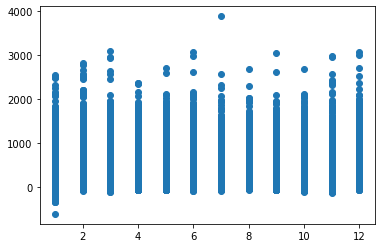

In [116]:
plt.scatter(df['MONTH'], df['DEP_DELAY'])

### Data Preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

### 1. Missing Values

In [ ]:
#Missing values count
df.isnull().sum()
#df.isna().sum()

In [ ]:
#Missing values %
df. isnull(). sum() * 100 / len(df)

In [ ]:
#Print rows which are missing in the variable 'DEP_TIME' - check validity of them being missing
isna_dep_time = (df[df['DEP_TIME'].isna()])
isna_dep_time.head()

In [ ]:
#Print rows which are populated for the variable 'CARRIER_DELAY'
notisna_carrier_delay = (df[~df['CARRIER_DELAY'].isna()])
notisna_carrier_delay.head()
#b[~np.isnan(a)]

In [ ]:
(df[~df['CARRIER_DELAY'].isna()]).count()


### EDA
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

In [ ]:
carriers = pd.read_csv(r'C:/Users/lkom/Work/MIT/MIT805/L_UNIQUE_CARRIERS.csv')
carrier_dict = dict(carriers.values)


In [64]:
df['DELAYED'] = df['ARR_DELAY'].apply(lambda x: x > 0) #from previous lesson

In [60]:
item_counts = df["DELAY"].value_counts()
print(item_counts)

1    18296443
0     9695820
Name: DELAY, dtype: int64


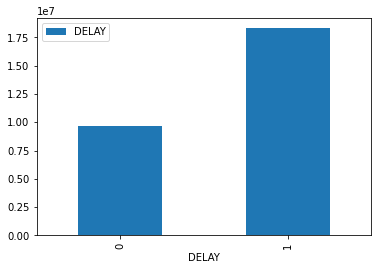

In [65]:
df.groupby('DELAY').agg({'DELAY':'count'}).plot.bar()
plt.show()

In [101]:
#Airlines
pd.options.display.float_format = '{0:.2f}'.format
b = df.groupby('OP_UNIQUE_CARRIER').agg({'DELAY':'sum'}).rename(index=carrier_dict)
#b['Flights'] = b['YEAR']/len(df)
print(b['DELAY'].sort_values(ascending=[False]))

OP_UNIQUE_CARRIER
Southwest Airlines Co.                      3391501.00
Delta Air Lines Inc.                        2304759.00
SkyWest Airlines Inc.                       2104409.00
American Airlines Inc.                      1954881.00
United Air Lines Inc.                       1497357.00
Republic Airline                             855284.00
Endeavor Air Inc.                            736556.00
Envoy Air                                    673834.00
JetBlue Airways                              636695.00
PSA Airlines Inc.                            604916.00
Alaska Airlines Inc.                         567420.00
Spirit Air Lines                             524736.00
Mesa Airlines Inc.                           467713.00
Frontier Airlines Inc.                       333356.00
Horizon Air                                  266784.00
Allegiant Air                                265170.00
ExpressJet Airlines LLC d/b/a aha!           217588.00
Hawaiian Airlines Inc.                       20

In [ ]:
#Flights per month
pd.options.display.float_format = '{0:.2%}'.format
flights_per_month = df.groupby(['YEAR','MONTH'])['MONTH'].count()
#df['YEAR'].groupby(df['YEAR','MONTH']).agg('count').plot.bar()
#plt.show()
print(flights_per_month)

#b.head()

In [ ]:
crossa = pd.crosstab(df.YEAR, df.MONTH,rownames=['YEAR'], colnames=['MONTH'],margins=True)
print(crossa)

In [ ]:
pd.crosstab(df.YEAR, df.MONTH, normalize='index')

In [ ]:
b.head()

In [19]:
#Airlines
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('OP_UNIQUE_CARRIER').agg({'YEAR':'count'}).rename(index=carrier_dict)
b['Flights'] = b['YEAR']/len(df)
print(b['Flights'].sort_values(ascending=[False]))

OP_UNIQUE_CARRIER
Southwest Airlines Co.                      19.14%
Delta Air Lines Inc.                        11.49%
SkyWest Airlines Inc.                       11.06%
American Airlines Inc.                      10.92%
United Air Lines Inc.                        8.21%
Republic Airline                             4.49%
JetBlue Airways                              3.87%
Envoy Air                                    3.75%
Endeavor Air Inc.                            3.49%
PSA Airlines Inc.                            3.35%
Alaska Airlines Inc.                         3.16%
Spirit Air Lines                             2.92%
Mesa Airlines Inc.                           2.64%
Frontier Airlines Inc.                       1.99%
Allegiant Air                                1.70%
Horizon Air                                  1.49%
ExpressJet Airlines LLC d/b/a aha!           1.26%
Hawaiian Airlines Inc.                       1.09%
Air Wisconsin Airlines Corp                  0.86%
Piedmont Airl

In [ ]:
#Months
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('MONTH').agg({'YEAR':'count'}).rename(index=carrier_dict)
b['Flights'] = b['YEAR']/len(df)
print(b['Flights'].sort_values(ascending=[False]))

In [ ]:
b['Flights'].plot(kind='pie', y='value_column')

In [82]:
airports = pd.read_csv(r'C:/Users/lkom/Work/MIT/MIT805/L_AIRPORT_ID.csv')
airport_dict = dict(airports.values)

In [99]:
#Airports
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('ORIGIN_AIRPORT_ID').agg({'YEAR':'count'}).rename(index=airport_dict)
b['Airport'] = b['YEAR']/len(df)
print(b['YEAR'].sort_values(ascending=[False]),b['Airport'].sort_values(ascending=[False]))
#b.head()

ORIGIN_AIRPORT_ID
Atlanta, GA: Hartsfield-Jackson Atlanta International     1344275
Chicago, IL: Chicago O'Hare International                 1272621
Denver, CO: Denver International                          1134840
Dallas/Fort Worth, TX: Dallas/Fort Worth International    1079704
Charlotte, NC: Charlotte Douglas International             847811
                                                           ...   
Cold Bay, AK: Cold Bay Airport                                262
Mobile, AL: Mobile Downtown                                   205
Wilmington, DE: New Castle                                    165
Rota, TT: Benjamin Taisacan Manglona International            151
Youngstown/Warren, OH: Youngstown-Warren Regional               2
Name: YEAR, Length: 388, dtype: int64 ORIGIN_AIRPORT_ID
Atlanta, GA: Hartsfield-Jackson Atlanta International    4.80%
Chicago, IL: Chicago O'Hare International                4.55%
Denver, CO: Denver International                         4.05%
Dallas/Fort

In [103]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('OP_UNIQUE_CARRIER').agg({'DELAY':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Delayed'] = b['DELAY']/b['YEAR']
print(b['Pct_Delayed'].sort_values(ascending=[False]))

OP_UNIQUE_CARRIER
Endeavor Air Inc.                           75.33%
Cape Air                                    73.45%
Delta Air Lines Inc.                        71.66%
Republic Airline                            68.04%
SkyWest Airlines Inc.                       68.00%
GoJet Airlines LLC d/b/a United Express     66.53%
Hawaiian Airlines Inc.                      66.16%
Alis Cargo Airlines S.P.A.                  66.10%
Air Wisconsin Airlines Corp                 66.06%
United Air Lines Inc.                       65.13%
PSA Airlines Inc.                           64.48%
Spirit Air Lines                            64.20%
Envoy Air                                   64.13%
Alaska Airlines Inc.                        64.05%
American Airlines Inc.                      63.94%
Horizon Air                                 63.87%
Piedmont Airlines                           63.52%
Southwest Airlines Co.                      63.32%
Mesa Airlines Inc.                          63.21%
ExpressJet Ai

In [ ]:
df.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).rename(index=carrier_dict).sort_values('DEP_DELAY', ascending=False).plot.bar()
plt.show()

In [105]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('MONTH').agg({'DELAY':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Delayed'] = b['DELAY']/b['YEAR']
print(b['Pct_Delayed'])

MONTH
1    67.59%
2    64.05%
3    65.81%
4    63.90%
5    65.40%
6    59.97%
7    63.02%
8    63.46%
9    71.47%
10   67.58%
11   68.64%
12   63.44%
Name: Pct_Delayed, dtype: float64


In [106]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('DAY_OF_WEEK').agg({'DELAY':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Delayed'] = b['DELAY']/b['YEAR']
print(b['Pct_Delayed'])

DAY_OF_WEEK
1   64.88%
2   67.71%
3   66.81%
4   63.12%
5   62.89%
6   67.66%
7   65.01%
Name: Pct_Delayed, dtype: float64


In [112]:
pd.set_option("display.max.columns", None)
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('ORIGIN_AIRPORT_ID').agg({'DELAY':'sum','YEAR':'count'}).rename(index=airport_dict)
b['Pct_Delayed'] = b['DELAY']/b['YEAR']
print(b['Pct_Delayed'].sort_values(ascending=[False]))

ORIGIN_AIRPORT_ID
Victoria, TX: Victoria Regional                                       85.45%
Fort Leonard Wood, MO: Waynesville-St. Robert Regional Forney Field   83.52%
Fort Dodge, IA: Fort Dodge Regional                                   81.85%
Hibbing, MN: Range Regional                                           81.15%
Pocatello, ID: Pocatello Regional                                     81.12%
                                                                       ...  
Adak Island, AK: Adak                                                 40.18%
Pago Pago, TT: Pago Pago International                                39.18%
Wilmington, DE: New Castle                                            38.79%
Cold Bay, AK: Cold Bay Airport                                        28.63%
Youngstown/Warren, OH: Youngstown-Warren Regional                      0.00%
Name: Pct_Delayed, Length: 388, dtype: float64


In [67]:
df.CANCELLED.value_counts()

0.00    27241845
1.00      750418
Name: CANCELLED, dtype: int64

In [66]:
item_counts = df["CANCELLED"].value_counts()
print(item_counts)

0.00    27241845
1.00      750418
Name: CANCELLED, dtype: int64


In [ ]:
sum(df['CANCELLED']==1)

In [ ]:
#cancelled flights
a = sum(df['CANCELLED']==1)/len(df)
"{0:.2%}".format(a)

In [ ]:
from tabulate import tabulate

In [ ]:
b = df.groupby('YEAR').agg({'CANCELLED':'sum','YEAR':'count'})
b['Pct_Cancelled'] = b['CANCELLED']/b['YEAR']
pd.options.display.float_format = '{0:.2%}'.format
print(b)

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('OP_UNIQUE_CARRIER').agg({'CANCELLED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Cancelled'] = b['CANCELLED']/b['YEAR']
print(b['Pct_Cancelled'].sort_values(ascending=[False]))

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('MONTH').agg({'CANCELLED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Cancelled'] = b['CANCELLED']/b['YEAR']
print(b['Pct_Cancelled'])

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('DAY_OF_WEEK').agg({'CANCELLED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Cancelled'] = b['CANCELLED']/b['YEAR']
print(b['Pct_Cancelled'])

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('ORIGIN_AIRPORT_ID').agg({'CANCELLED':'sum','YEAR':'count'}).rename(index=airport_dict)
b['Pct_Cancelled'] = b['CANCELLED']/b['YEAR']
print(b['Pct_Cancelled'].sort_values(ascending=[False]))

In [ ]:
#diverted flights
a = sum(df['DIVERTED']==1)/len(df)
"{0:.2%}".format(a)

In [ ]:
b = df.groupby('YEAR').agg({'DIVERTED':'sum','YEAR':'count'})
b['Pct_Diverted'] = b['DIVERTED']/b['YEAR']
pd.options.display.float_format = '{0:.2%}'.format
print(b)

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('OP_UNIQUE_CARRIER').agg({'DIVERTED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Diverted'] = b['DIVERTED']/b['YEAR']
print(b['Pct_Diverted'].sort_values(ascending=[False]))

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('MONTH').agg({'DIVERTED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Diverted'] = b['DIVERTED']/b['YEAR']
print(b['Pct_Diverted'])

In [ ]:
pd.options.display.float_format = '{0:.2%}'.format
b = df.groupby('DAY_OF_WEEK').agg({'DIVERTED':'sum','YEAR':'count'}).rename(index=carrier_dict)
b['Pct_Diverted'] = b['DIVERTED']/b['YEAR']
print(b['Pct_Diverted'])

In [ ]:
#Delay Reasons
print("Percentage of missing values:", (df.CARRIER_DELAY.isna().sum()*100/len(df)))

In [ ]:
#Distribution of delays
df.loc[:,['DepDelay', 'ArrDelay']].plot.density(xlim=(-50,100))

In [ ]:
#Which Airlines have the longest delays

#carriers = pd.read_csv(r'C:\Users\lkom\MIT\airplane\carriers.csv')
#carrier_dict = dict(carriers.values)
df.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).rename(index=carrier_dict).sort_values('DEP_DELAY', ascending=False).plot.bar()
plt.show()

In [ ]:
df.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).rename(index=carrier_dict).sort_values('ARR_DELAY', ascending=False).plot.bar()
plt.show()

In [ ]:
#Delays by year
df.groupby('YEAR').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.line()
plt.show()

In [ ]:
#Delays by month
df.groupby('MONTH').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.line()
plt.show()

In [ ]:
#Delays by day
df.groupby('DAY_OF_WEEK').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.line()
plt.show()

In [ ]:
#worst time to travel
df['CRS_DEP_TIME'] = pd.cut(df.CRS_DEP_TIME, list(range(0, 2500, 100)))

In [ ]:
df.groupby('CRS_DEP_TIME').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.bar()
plt.show()

In [ ]:
dir() #show all names of objects

In [ ]:
#cancelled flights: select all the rows with cancelled flights and insert them into their own dataframe

cancelled_flights = df[df['CANCELLED']==1]
#del(cancelled_flights['CRS_DEP_TIME'])

### Correlation

### Categorise the deemed numeric variables to categorical variables

In [ ]:
!pip install dython
from dython.nominal import associations

In [ ]:
df['YEAR'] = pd.Categorical(df.YEAR)
df['MONTH'] = pd.Categorical(df.MONTH)
df['DAY_OF_WEEK'] = pd.Categorical(df.DAY_OF_WEEK)
df['ORIGIN_AIRPORT_ID'] = pd.Categorical(df.ORIGIN_AIRPORT_ID)
df['DEST_AIRPORT_ID'] = pd.Categorical(df.DEST_AIRPORT_ID)
df['DAY_OF_MONTH'] = pd.Categorical(df.DAY_OF_MONTH)

In [ ]:
#identify categorical variables
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

In [ ]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [ ]:
df.corr()

In [98]:
df['ARR_DELAY'].corr(df['DEP_DELAY'])

0.9618582034933035

In [ ]:
df.hist(figsize  = [15, 15],bins=12) 
plt.show()

### References

- https://shawnemhe.github.io/udacity-data-analyst/p6/python_eda/python_eda.html
- https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7
- https://www.kaggle.com/code/jcbrooks/airlines-delay-and-cancellation-analysis
- https://github.com/JaHerbas/Predicting_Flight_Delays
- https://medium.com/analytics-vidhya/modeling-flight-delays-through-u-s-flight-data-2f0b3d7e2c89
- https://www.elastic.co/guide/en/machine-learning/7.17/flightdata-regression.html
- https://dmkothari.github.io/Flight-Delays-Time-Series-Analysis/
- https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-flight-delays-f8a713ef7121
- https://www.kaggle.com/code/adveros/flight-delay-eda-exploratory-data-analysis/notebook